# Diabetese prediction using Machine learning algorithms.

##IDA(Initial Data analysis)

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')
from joblib import dump, load 

In [2]:
# Reading the dataset using Pandas library
df_diabetes = pd.read_csv('https://raw.githubusercontent.com/PuneetSharma1212/dataset/main/diabetes.csv')

In [5]:
# Identifying the number of rows and number of features of dataset using shape method.
df_diabetes.shape

(768, 9)

In [6]:
# Printing top five rows of dataset.
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# Printing bottom five rows of dataset.
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [8]:
# Identifying the data types of every feature.
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### Identifying the presense of null values

In [85]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 22.249999999999993, 'Heatmap of missing Values')

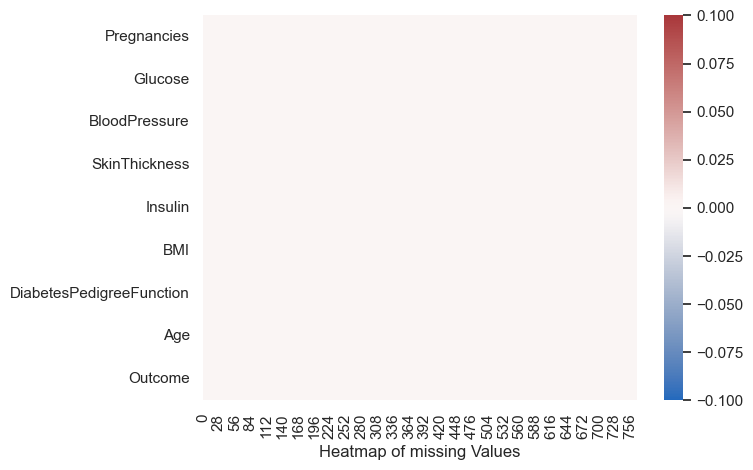

In [90]:
# plotting all missing values in a heatmap.
sns.heatmap(df_diabetes.isnull().T, cbar=True, cmap="vlag")
plt.xlabel("Heatmap of missing Values")

The dataframe does not have any null values

#### Identifying the presence of 0 values in dataset

In [15]:
(df_diabetes == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

As from above output we can see that dataset consist several 0 values for Glucose, BloodPressure, Pregnancies, SkinThickness, Insulin and BMI. This appears to be an issue in the dataset and hense needs to be corrected. I have replaced these 0 values with the mean value of the respective column values in next step.

#### Handeling 0 values:
Replacing 0 values available in Glucose, BloodPressure, Pregnancies, SkinThickness, Insulin and BMI features with the mean value of all the rows in the respective column.

In [135]:
df_diabetes_before = df_diabetes.copy()
Column_to_modify = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for column in Column_to_modify:
  df_diabetes[column] = df_diabetes[column].replace(0, np.NaN)
  mean = int(df_diabetes[column].mean(skipna = True))
  df_diabetes[column] = df_diabetes[column].replace(np.NaN, mean)
  df_diabetes.round(4)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [11]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
df_diabetes = df_diabetes.astype({'Pregnancies': 'int64','Glucose': 'int64', 'BloodPressure': 'int64', 'SkinThickness': 'int64', 'Insulin': 'int64' })

In [13]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [14]:
# printing top five rows of dataset before replacing the zero values with mean.
df_diabetes_before.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
# printing top five rows of dataset after replacing the zero values with mean.
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,155,33.6,0.627,50,1
1,1,85,66,29,155,26.6,0.351,31,0
2,8,183,64,29,155,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,4,137,40,35,168,43.1,2.288,33,1


From above output we can see that the 0 values in columns 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',  have been replaced with the mean values.

#### Histograms to understand the skewness of values for each feature.

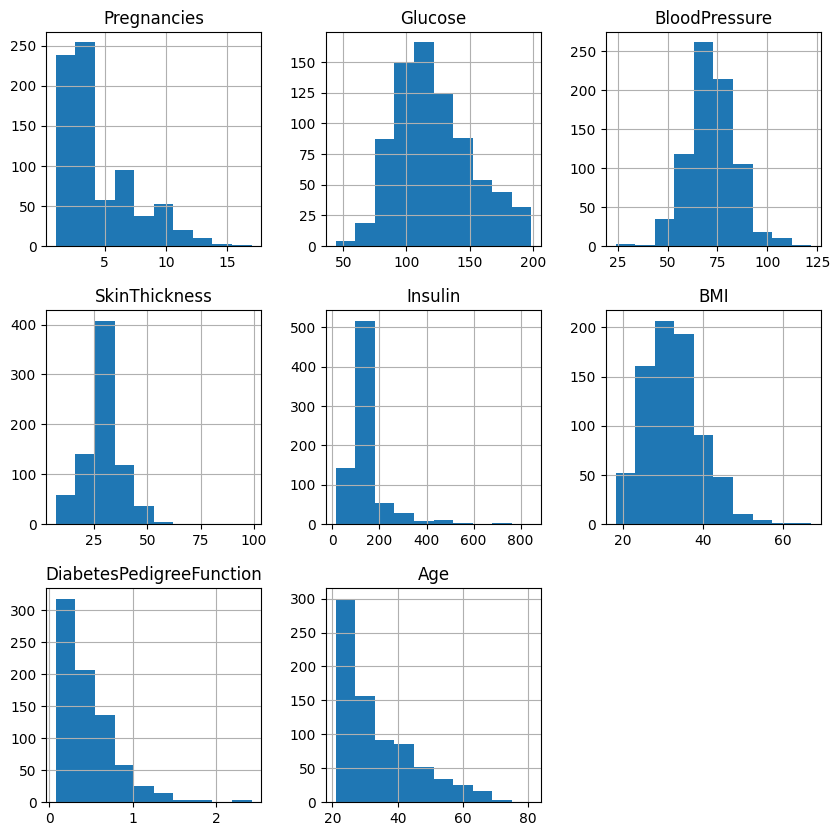

In [16]:
# Plotting the distribution of all the variables
df_diabetes1 = df_diabetes.drop('Outcome', axis=1)
ax = df_diabetes1.hist(figsize = (10,10))
plt.show()

#### Outliers detection using box plots

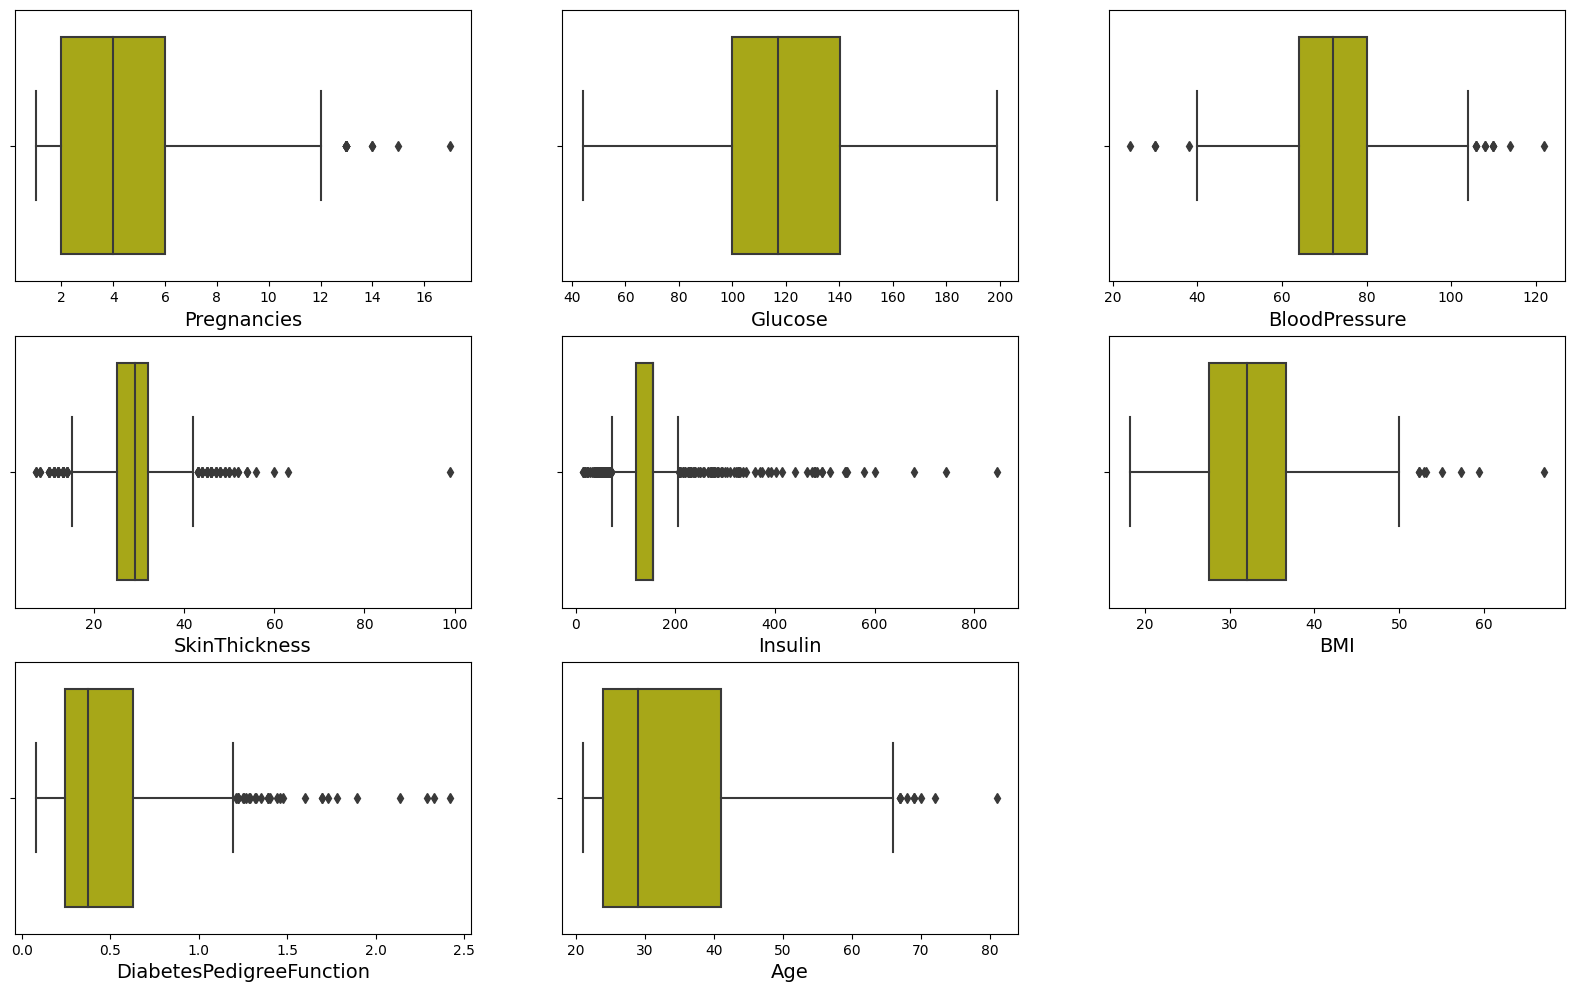

In [17]:
# set a = 1 to increment
a=1
# set figure size
plt.figure(figsize=(20,12))
# iterate through numerical measures
for attr in df_diabetes1:
    # create subplots
    plt.subplot(3,3,a)
    # plot boxplot
    ax=sns.boxplot(x=attr, data=df_diabetes1, color='y')
    # set label
    plt.xlabel(attr, fontsize=14)
    # increment a
    a+=1
# show plot
plt.show()

#### Scale the features using power transformed from of sklearn.

In [18]:
# scale the features using PowerTransformer scaler of sklearn.
X = df_diabetes.drop('Outcome', axis=1)
pt = PowerTransformer()
# scaler = StandardScaler()
# scaler = scaler.fit(X)
# X = scaler.transform(X)
# features = pd.DataFrame(X, columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
# features

In [19]:
dump(pt, 'pt.joblib')

['pt.joblib']

In [20]:
pt = pt.fit_transform(X)
X= pd.DataFrame(pt, columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

#### Histogram of features after performing scaling on dataset.

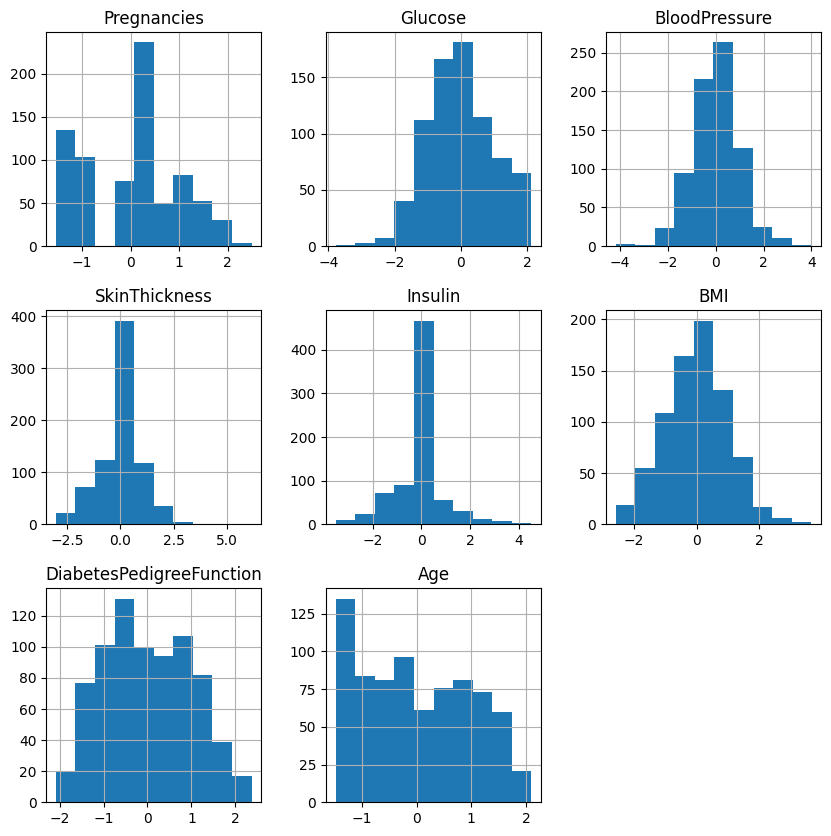

In [21]:
ax = X.hist(figsize = (10,10))

## EDA(Exploratory Data Analysis) 

###Descriptive statistics of Dataset

In [22]:
stats = df_diabetes.describe().T
print("Statistical mesures of the data:\n")
stats

Statistical mesures of the data:



,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.423177,2.980481,1.000,2.00000,4.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,155.281250,85.021550,14.000,121.50000,155.0000,155.00000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Method describe() of Pandas DataFrame is used to list statistical properties of all the features.

Statistical properties such as Count, Mean, Standard Deviation, Minimum Value, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value are obtained.

###Identifying the number of people with and without diabetes as per dataset.

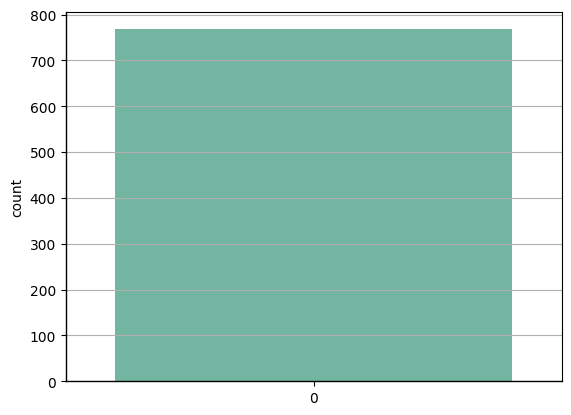

In [23]:
# Seaborne library to plot the countplot of target variable which is 'Outcome'.
ax1 = sns.countplot(df_diabetes['Outcome'], palette='Set2')
ax1.yaxis.grid()
ax1.spines['top'].set_visible(True)
ax1.spines['right'].set_visible(True)
ax1.spines['bottom'].set_linewidth(True)
ax1.spines['left'].set_linewidth(True)

In [24]:
# The number of people with diabetes is about half of the number of those without.

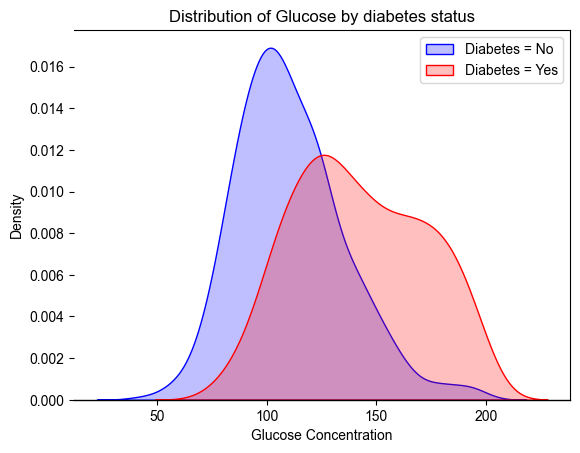

In [25]:
# We can use the KDE plot to separately visualize the distribution of features for people with and without diabetes


ax = sns.kdeplot(df_diabetes.Glucose[(df_diabetes["Outcome"] == 0) ],
                color="Blue", shade = True)
ax = sns.kdeplot(df_diabetes.Glucose[(df_diabetes["Outcome"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Diabetes = No","Diabetes = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Glucose Concentration')
ax.set_title('Distribution of Glucose by diabetes status')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_linewidth(True)
ax.spines['left'].set_linewidth(False)


# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

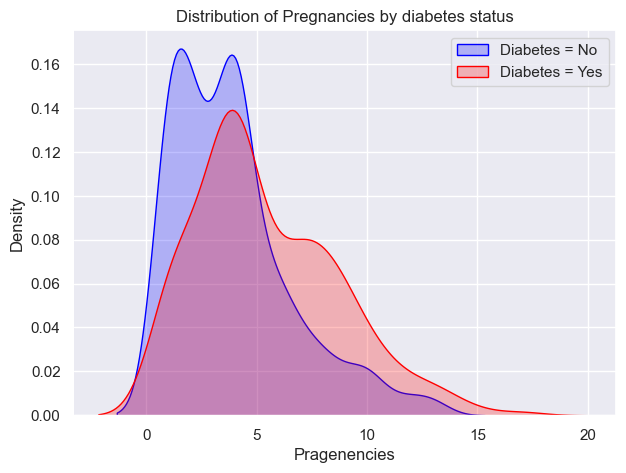

In [26]:
# Pregnancies


ax = sns.kdeplot(df_diabetes.Pregnancies[(df_diabetes["Outcome"] == 0) ],
                color="Blue", shade = True)
ax = sns.kdeplot(df_diabetes.Pregnancies[(df_diabetes["Outcome"] == 1) ],
                ax =ax, color="Red", shade= True)
ax.legend(["Diabetes = No","Diabetes = Yes"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Pragenencies')
ax.set_title('Distribution of Pregnancies by diabetes status')

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_linewidth(True)
ax.spines['left'].set_linewidth(False)


# figure size in inches
sns.set(rc={'figure.figsize':(7,5)})

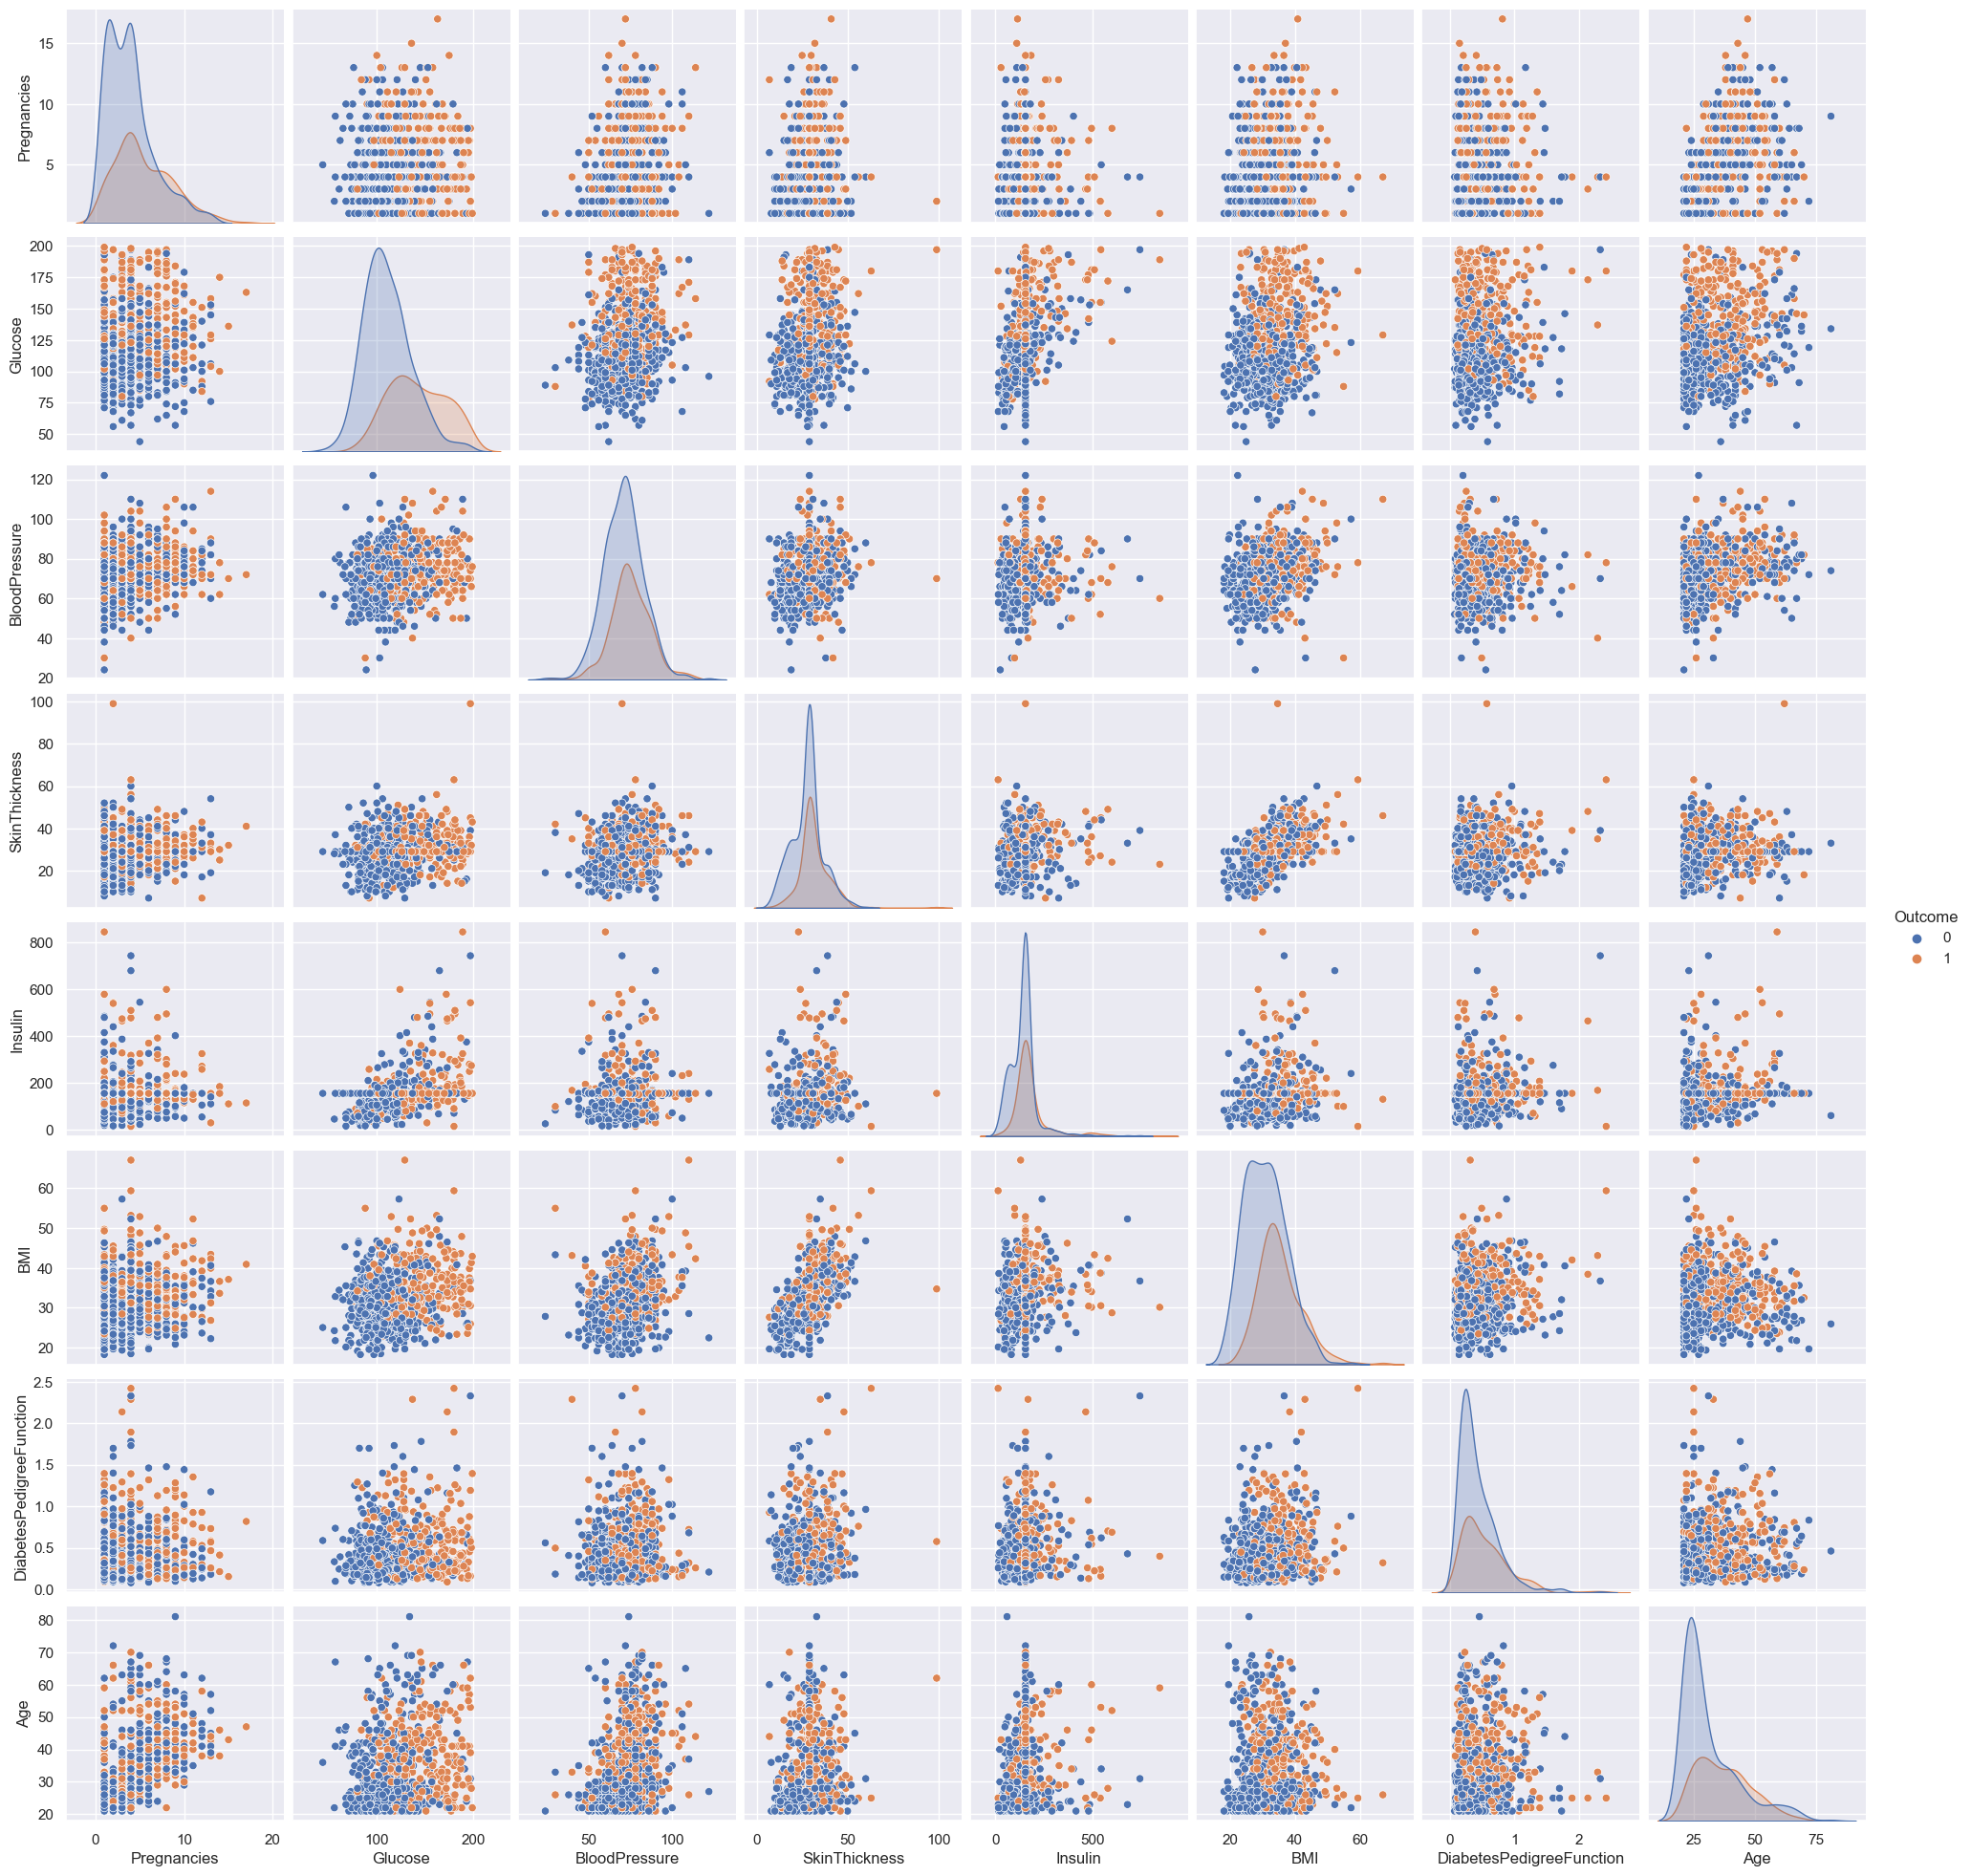

In [27]:
# Pair Plot allows us to plot the KDE - such as the one above - for all the combination of variables
# It also yields scatter plots

ax = sns.pairplot(df_diabetes,hue= "Outcome")

In [28]:
# We can conclude that older age, high glucose concentration, and highe number pregnancies are associated with diabetes.
# However, the association doesn't seem to be strong.

In [29]:
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,155,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,29,155,30.1,0.349,47,1
767,1,93,70,31,155,30.4,0.315,23,0


Using correlation matrix to understand the correlation between variables

We can exclude the vraibales, from the model, that have strong correlation with the other variables

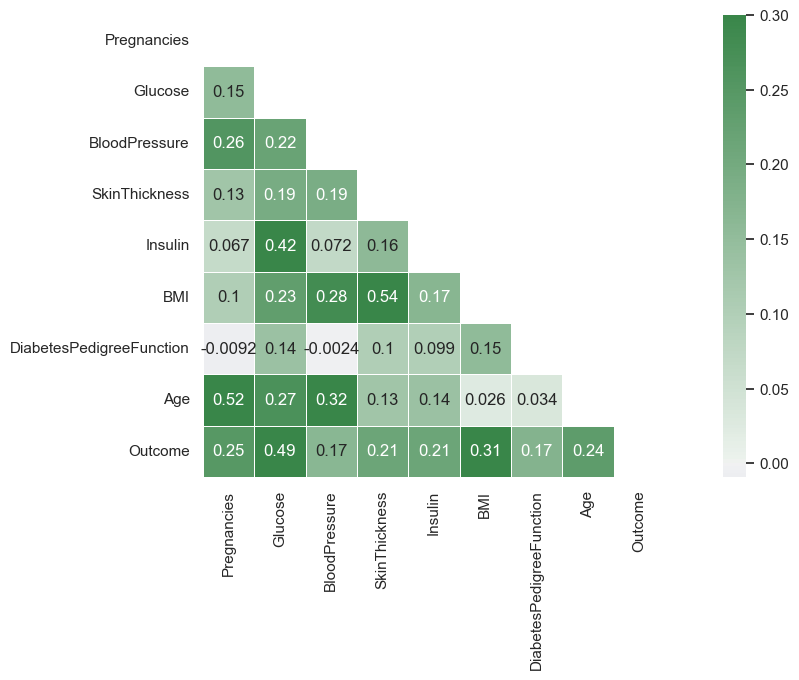

In [30]:
df_corr = df_diabetes.corr()
sns.set(style="white")
mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 6))

cmap = sns.diverging_palette(255, 133, as_cmap=True)
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, annot=True)

plt.yticks(rotation=0, ha="right")
plt.xticks(rotation=90, ha="center")

plt.show()

As per above correlation matrix, none of the variables has a strong correlation with any other, we can't eliminate any of the variables

## Implementation of Machine learning algorithms


#### Five individual machine learning models developed are:

 * Logistic Regression
 * Decision Tree
 * KNN
 * Random Forest
 * AdaBoosting

#### Two ensemble machine learning models developed are:

 * Voting Classifier

In [31]:
# We will split the data set into train and test (30% of the original dataframe)
y= df_diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [32]:
# Logistic Regression
logreg = LogisticRegression(solver='newton-cg', class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

Logistic regression Accuracy score:
0.7402597402597403


Confusion Matrix
[[122  35]
 [ 25  49]]


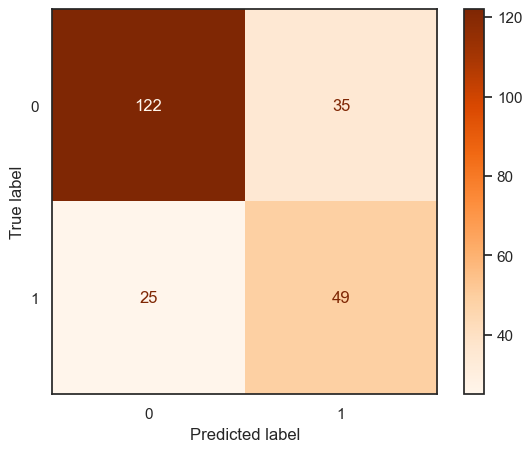

In [33]:
y_pred_logreg = logreg.predict(X_test)
print('Logistic regression Accuracy score:')
print(accuracy_score(y_test, y_pred_logreg))
print('\n')

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_logreg))

fig1 = plot_confusion_matrix(logreg, X_test, y_test, cmap= plt.cm.Oranges)

In [34]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       157
           1       0.58      0.66      0.62        74

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.75      0.74      0.74       231



In [35]:
logreg_cv = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10)
print(logreg_cv)
print('The average accuracy of the 10 K-fold', logreg_cv.mean()*100)

[0.77777778 0.7962963  0.77777778 0.77777778 0.7037037  0.83333333
 0.72222222 0.69811321 0.79245283 0.77358491]
The average accuracy of the 10 K-fold 76.53039832285116


In [36]:
# Decision Tree
dectree = DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65})
dectree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65})

Accuracy score of decision tree model:
0.7619047619047619


Confusion Matrix
[[126  31]
 [ 24  50]]


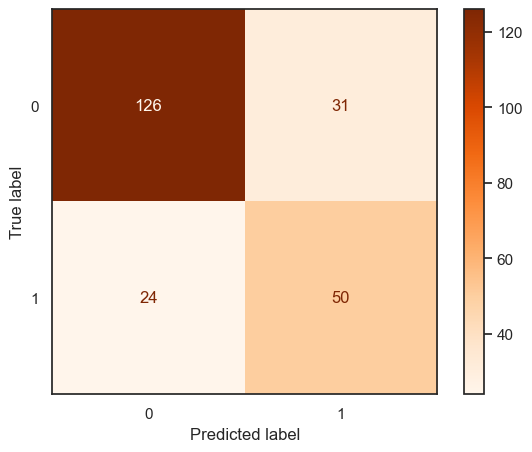

In [37]:
y_pred_dectree = dectree.predict(X_test)
print('Accuracy score of decision tree model:')
print(accuracy_score(y_test, y_pred_dectree))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dectree))

fig1 = plot_confusion_matrix(dectree, X_test, y_test, cmap= plt.cm.Oranges)

In [38]:
print(classification_report(y_test, y_pred_dectree))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       157
           1       0.62      0.68      0.65        74

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



In [39]:
dectree_cv = cross_val_score(estimator = dectree, X = X_train, y = y_train, cv = 10)
print(dectree_cv)
print('The average accuracy of the 10 K-fold', dectree_cv.mean()*100)

[0.62962963 0.64814815 0.66666667 0.68518519 0.61111111 0.75925926
 0.55555556 0.60377358 0.69811321 0.69811321]
The average accuracy of the 10 K-fold 65.55555555555557


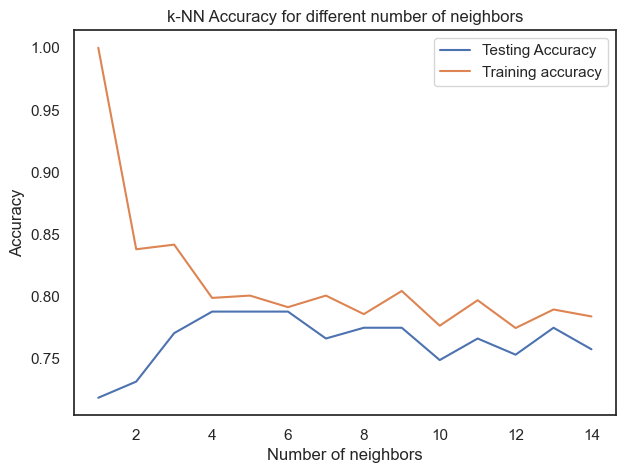

In [40]:
# KNN
# We will check the accuracy with different number of neighbors

neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
    
    
plt.title('k-NN Accuracy for different number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [41]:
# The accuracy on the test dataset is maximum with 5 neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy
0.7878787878787878


Confusion Matrix
[[138  19]
 [ 30  44]]


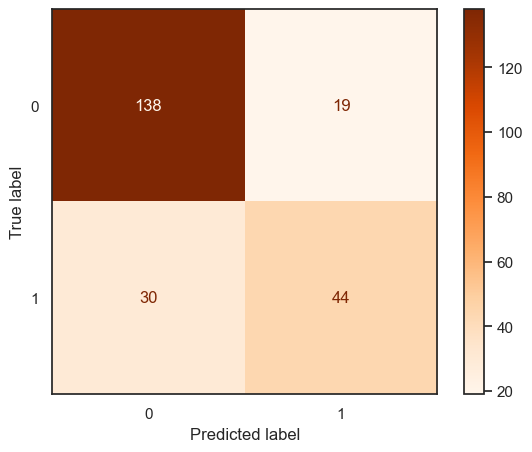

In [42]:
y_pred_knn = knn.predict(X_test)
print('Accuracy')
print(accuracy_score(y_test, y_pred_knn))
print('\n')

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))

fig1 = plot_confusion_matrix(knn, X_test, y_test, cmap= plt.cm.Oranges)

In [43]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.70      0.59      0.64        74

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231



In [44]:
knn_cv = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
print(knn_cv)
print('The average accuracy of the 10 K-fold', knn_cv.mean()*100)

[0.72222222 0.7037037  0.7037037  0.87037037 0.75925926 0.77777778
 0.57407407 0.64150943 0.69811321 0.75471698]
The average accuracy of the 10 K-fold 72.0545073375262


In [45]:
ranfor = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
ranfor.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [46]:
y_pred_ranfor = ranfor.predict(X_test)
print('Accuracy')
print(accuracy_score(y_test, y_pred_ranfor))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ranfor))

Accuracy
0.7662337662337663


Confusion Matrix
[[136  21]
 [ 33  41]]


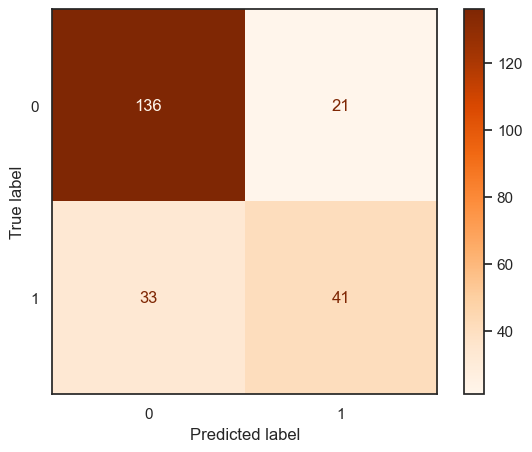

In [47]:
fig1 = plot_confusion_matrix(ranfor, X_test, y_test, cmap= plt.cm.Oranges)

In [48]:
print(classification_report(y_test, y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



In [49]:
ranfor_cv = cross_val_score(estimator = ranfor, X = X_train, y = y_train, cv = 10)
print(ranfor_cv)
print('The average accuracy of the 10 K-fold', ranfor_cv.mean()*100)

[0.68518519 0.75925926 0.81481481 0.72222222 0.85185185 0.77777778
 0.66666667 0.64150943 0.77358491 0.81132075]
The average accuracy of the 10 K-fold 75.041928721174


In [50]:
abc = AdaBoostClassifier(n_estimators=1000)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1000)

In [51]:
y_pred_abc = abc.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_abc))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_abc))

Confusion Matrix
[[128  29]
 [ 33  41]]


Accuracy
0.7316017316017316


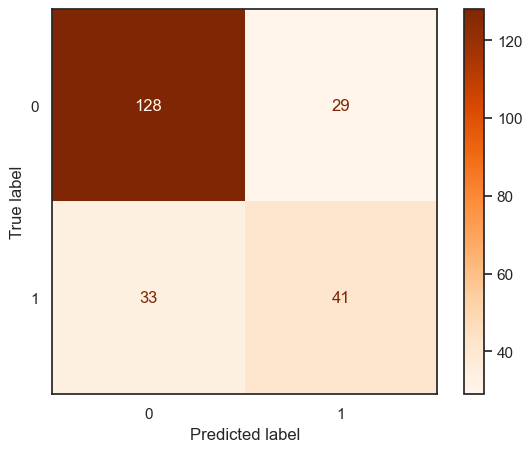

In [52]:
fig1 = plot_confusion_matrix(abc, X_test, y_test, cmap= plt.cm.Oranges)

In [53]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.59      0.55      0.57        74

    accuracy                           0.73       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.73      0.73      0.73       231



In [54]:
abc_cv = cross_val_score(estimator = abc, X = X_train, y = y_train, cv = 10)
print(abc_cv)
print('The average accuracy of the 10 K-fold', abc_cv.mean()*100)

[0.7037037  0.62962963 0.68518519 0.75925926 0.62962963 0.77777778
 0.66666667 0.54716981 0.75471698 0.67924528]
The average accuracy of the 10 K-fold 68.3298392732355


In [55]:
# We have already used two ensemble methods - Random Forests (Averaging) and Adaptive Boosting (Boosting) 
# To improve accuracy, we will combine different classifiers using Voting Classifier, which is also an ensemble method. 

In [56]:
# Voting Classifier without weights



vc = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('ranfor',ranfor),('knn',knn),('abc',abc)], 
                      voting='soft')
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(class_weight='balanced',
                                                 solver='newton-cg')),
                             ('dectree',
                              DecisionTreeClassifier(class_weight={0: 0.35,
                                                                   1: 0.65})),
                             ('ranfor',
                              RandomForestClassifier(n_estimators=300)),
                             ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier(n_estimators=1000))],
                 voting='soft')

In [57]:
y_pred_vc = vc.predict(X_test)
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc))

Accuracy
0.7878787878787878


Confusion Matrix
[[132  25]
 [ 24  50]]


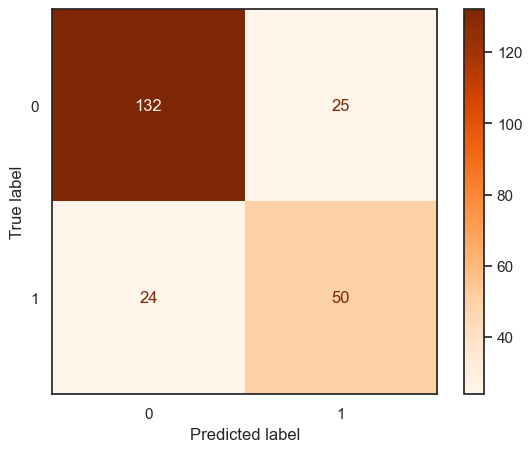

In [58]:
fig= plot_confusion_matrix(vc, X_test ,y_test,cmap= plt.cm.Oranges)

In [59]:
print(classification_report(y_test, y_pred_vc))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       157
           1       0.67      0.68      0.67        74

    accuracy                           0.79       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231



In [60]:
vc_cv = cross_val_score(estimator = vc, X = X_train, y = y_train, cv = 10)
print(vc_cv)
print('The average accuracy of the 10 K-fold', vc_cv.mean()*100)

[0.68518519 0.72222222 0.75925926 0.81481481 0.7962963  0.77777778
 0.64814815 0.67924528 0.75471698 0.75471698]
The average accuracy of the 10 K-fold 73.92382948986722


In [61]:
# The accuracy of Voting Calssifier is more than any of the other individual classsifiers

In [62]:
# Now, we will use Voting classifier with weights
# We will assign more weight to the classifiers with better accuracy

In [63]:
# Voting Classifier with weights

vc1 = VotingClassifier(estimators=[('logreg',logreg),('dectree',dectree),('ranfor',ranfor),('knn',knn),('abc',abc)], 
                      voting='soft', weights=[2,2,2,2,2])
vc1.fit(X_train, y_train)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(class_weight='balanced',
                                                 solver='newton-cg')),
                             ('dectree',
                              DecisionTreeClassifier(class_weight={0: 0.35,
                                                                   1: 0.65})),
                             ('ranfor',
                              RandomForestClassifier(n_estimators=300)),
                             ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier(n_estimators=1000))],
                 voting='soft', weights=[2, 2, 2, 2, 2])

In [64]:
dump(vc1, 'vc1.joblib')

['vc1.joblib']

Confusion Matrix
[[135  22]
 [ 23  51]]


Accuracy
0.8051948051948052


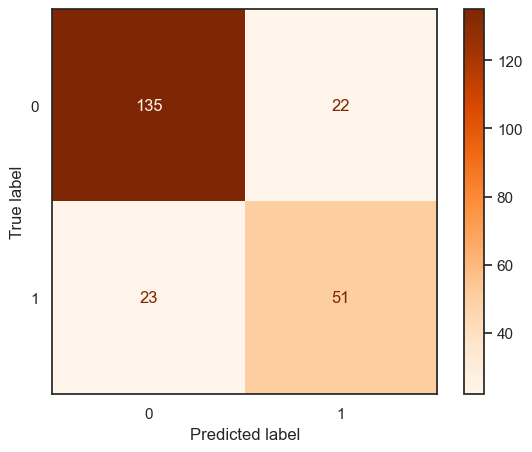

In [65]:
y_pred_vc1 = vc1.predict(X_test)

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_vc1))
print('\n')
print('Accuracy')
print(accuracy_score(y_test, y_pred_vc1))
fig= plot_confusion_matrix(vc1, X_test ,y_test,cmap= plt.cm.Oranges)

In [66]:
print(classification_report(y_test, y_pred_vc1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       157
           1       0.70      0.69      0.69        74

    accuracy                           0.81       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231



In [67]:
vc1_cv = cross_val_score(estimator = vc1, X = X_train, y = y_train, cv = 10)
print(vc1_cv)
print('The average accuracy of the 10 K-fold', vc1_cv.mean()*100)

[0.68518519 0.75925926 0.74074074 0.81481481 0.77777778 0.7962963
 0.66666667 0.67924528 0.75471698 0.73584906]
The average accuracy of the 10 K-fold 74.10552061495457


In [68]:
print('Model Accuracy')
print('\n')
print('Logistic Regression: '+str(round(accuracy_score(y_test, y_pred_logreg)*100,2))+'%')
print('Decision Tree: '+str(round(accuracy_score(y_test, y_pred_dectree)*100,2))+'%')
print('KNN: '+str(round(accuracy_score(y_test, y_pred_knn)*100,2))+'%')
print('\n')
print('Averaging Method')
print('Random Forest: '+str(round(accuracy_score(y_test, y_pred_ranfor)*100,2))+'%')
print('\n')
print('Boosting Method')
print('AdaBoost: '+str(round(accuracy_score(y_test, y_pred_abc)*100,2))+'%')
print('\n')
print('Voting Classifiers')
print('Voting Classifier without Weights: '+str(round(accuracy_score(y_test, y_pred_vc)*100,2))+'%')
print('Voting Classifier with Weights: '+str(round(accuracy_score(y_test, y_pred_vc1)*100,2))+'%')

Model Accuracy


Logistic Regression: 74.03%
Decision Tree: 76.19%
KNN: 78.79%


Averaging Method
Random Forest: 76.62%


Boosting Method
AdaBoost: 73.16%


Voting Classifiers
Voting Classifier without Weights: 78.79%
Voting Classifier with Weights: 80.52%


In [69]:
print("The End!!")

The End!!


To Conclude, ensemble machine learning model developed withough weights have shown highest accuracy and thus this will be integrated with the developed web application.